<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/ET2_Bagging_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging Classifier (Step-by-Step)
This notebook explains **Bagging Classifier** using:
- Decision Tree
- SVM
- KNN

Designed for **learning + Google Colab**.

## 1. Import Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. Create Classification Dataset

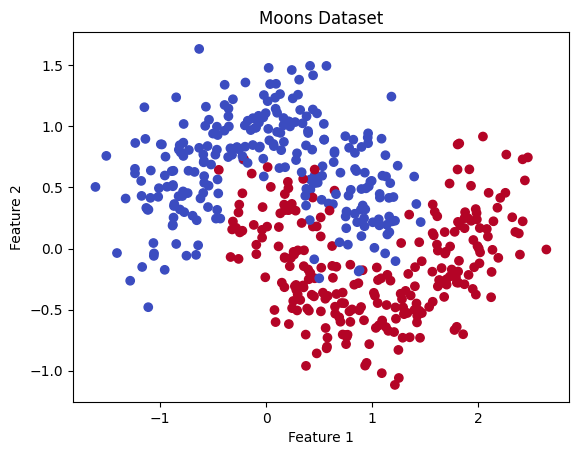

In [2]:

X, y = make_moons(
    n_samples=500,
    noise=0.25,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 3. Train-Test Split

In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


## 4. Choose Base Estimator

In [4]:

# Uncomment ONE base estimator

# base_model = DecisionTreeClassifier(max_depth=5, random_state=42)
# use_scaling = False

# base_model = SVC(kernel='rbf', probability=True)
# use_scaling = True

base_model = KNeighborsClassifier(n_neighbors=5)
use_scaling = True


## 5. Create Bagging Classifier

In [5]:

bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)


## 6. Handle Scaling using Pipeline

In [6]:

if use_scaling:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("bagging", bagging_model)
    ])
else:
    model = bagging_model


## 7. Train the Model

In [7]:

model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging',
                 BaggingClassifier(estimator=KNeighborsClassifier(),
                                   max_samples=0.8, n_estimators=50,
                                   random_state=42))])

## 8. Evaluate Model

In [8]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9466666666666667

Confusion Matrix:
 [[71  4]
 [ 4 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.95      0.95      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



## 9. Visualization (Predicted Classes)

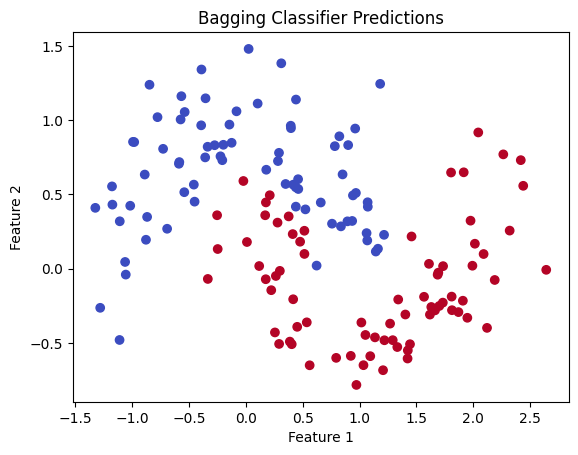

In [9]:

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Bagging Classifier Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Final Notes
- Decision Tree does not require scaling
- SVM and KNN **require scaling**
- Bagging reduces variance and improves stability

**Try changing `n_estimators`, `max_samples`, and base models**